In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import random
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
ranks = pd.read_pickle("data/gene_dependency_ranks_above_0-5.pkl")
#ranks = pd.read_csv("/home/ccoquide/Bureau/PhD/CNWW/PROJECT/GIT/cancer_networks/data/gene_dependency_ranks_above_0-5.csv")

In [4]:
correlation_matrix = ranks[ranks.columns].corr()
correlation_matrix.columns


Index(['ACH-000004', 'ACH-000005', 'ACH-000007', 'ACH-000009', 'ACH-000011',
       'ACH-000012', 'ACH-000013', 'ACH-000014', 'ACH-000015', 'ACH-000017',
       ...
       'ACH-001736', 'ACH-001737', 'ACH-001740', 'ACH-001745', 'ACH-001750',
       'ACH-001765', 'ACH-001814', 'ACH-001838', 'ACH-001956', 'ACH-001957'],
      dtype='object', length=625)

In [5]:
correlation_matrix.head()

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
ACH-000004,1.000000,0.597607,0.559754,0.601619,0.549539,0.616107,0.617855,0.570610,0.613056,0.572952,...,0.604702,0.440899,0.617321,0.612175,0.581896,0.623488,0.525925,0.574750,0.638381,0.577766
ACH-000005,0.597607,1.000000,0.517332,0.539486,0.543980,0.567064,0.585241,0.528067,0.566844,0.559278,...,0.573900,0.432757,0.542726,0.573932,0.562092,0.588682,0.503396,0.541913,0.593137,0.567709
ACH-000007,0.559754,0.517332,1.000000,0.619704,0.583177,0.615484,0.619687,0.577771,0.619181,0.590677,...,0.584793,0.423939,0.589390,0.608467,0.594487,0.618894,0.547127,0.585415,0.635545,0.609970
ACH-000009,0.601619,0.539486,0.619704,1.000000,0.600932,0.688942,0.671216,0.623072,0.679362,0.614023,...,0.611228,0.466910,0.619277,0.641885,0.631092,0.670831,0.565418,0.617422,0.692238,0.667032
ACH-000011,0.549539,0.543980,0.583177,0.600932,1.000000,0.619103,0.646230,0.606244,0.620201,0.598506,...,0.602342,0.479515,0.592567,0.613339,0.639647,0.654010,0.569661,0.620261,0.672639,0.669246


In [6]:
T_Links={}
N=len(correlation_matrix.columns)
Cell=correlation_matrix.columns
ww=open("data/cell_lines_corr_above0_5.dat","w")

In [7]:
for j in range(N):
    for i in range(j+1,N):
        T_Links[str(j)+","+str(i)]=correlation_matrix[Cell[j]][Cell[i]]
        ww.write(str(j)+"\t"+str(i)+"\t"+str(correlation_matrix[Cell[j]][Cell[i]])+"\n")
ww.close()

In [21]:
def extract_bb(G,alp):
    keep_graph = nx.Graph()
    for i in G:
        neigh=G[i]
        k=len(neigh)
        if k>1:
            W=sum(G.get_edge_data(i,j)['weight'] for j in neigh)
            for j in neigh:
                p=1.0*G.get_edge_data(i,j)['weight']/W
                if (1-p)**(k-1) < alp:
                    keep_graph.add_edge(i,j, weight = G.get_edge_data(i,j))
    return keep_graph, 1.0*len(keep_graph.edges())/(1.0*len(G.edges())),nx.number_connected_components(keep_graph) 

In [9]:
G=nx.Graph()

In [10]:
G.add_nodes_from(range(N))

In [15]:
A=[]

In [16]:
for i in list(T_Links.keys()):
    A.append((int(i.split(",")[0]), int(i.split(',')[1]), {'weight': T_Links[i]}))

In [17]:
G.add_edges_from(A)

In [24]:
alp=np.arange(0.27,0.34,0.001)
y1=alp.copy()
y2=alp.copy()
for i in np.arange(alp.size):
    rez=extract_bb(G,alp[i])
    y1[i]=rez[1]#fraction of remaining links
    y2[i]=rez[2]#number of connected components  
    print(alp[i], y1[i], y2[i])
    

0.27 1.5384615384615384e-05 1.0
0.271 1.5384615384615384e-05 1.0
0.272 1.5384615384615384e-05 1.0
0.273 1.5384615384615384e-05 1.0
0.274 1.5384615384615384e-05 1.0
0.275 1.5384615384615384e-05 1.0
0.276 1.5384615384615384e-05 1.0
0.277 2.0512820512820512e-05 2.0
0.278 2.564102564102564e-05 3.0
0.279 2.564102564102564e-05 3.0
0.28 2.564102564102564e-05 3.0
0.281 2.564102564102564e-05 3.0
0.28200000000000003 2.564102564102564e-05 3.0
0.28300000000000003 3.076923076923077e-05 4.0
0.28400000000000003 3.076923076923077e-05 4.0
0.28500000000000003 3.5897435897435896e-05 5.0
0.28600000000000003 5.128205128205128e-05 7.0
0.28700000000000003 5.641025641025641e-05 8.0
0.28800000000000003 6.153846153846154e-05 9.0
0.28900000000000003 7.692307692307693e-05 8.0
0.29000000000000004 7.692307692307693e-05 8.0
0.29100000000000004 8.717948717948718e-05 9.0
0.29200000000000004 9.23076923076923e-05 9.0
0.29300000000000004 0.0001076923076923077 8.0
0.29400000000000004 0.00011282051282051281 9.0
0.295000000

In [25]:
y2




array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  3.,  3.,  3.,  3.,  3.,
        4.,  4.,  5.,  7.,  8.,  9.,  8.,  8.,  9.,  9.,  8.,  9., 10.,
       11., 10., 10., 12., 12., 14., 16., 16., 14., 14., 16., 17., 17.,
       19., 15., 13., 12., 19., 11.,  9.,  8.,  6.,  2.,  3.,  3.,  2.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.])

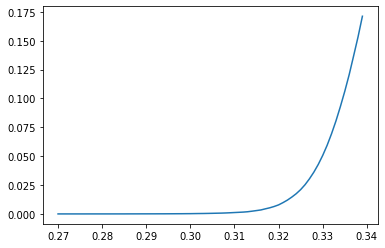

In [26]:
plt.plot(alp,y1)

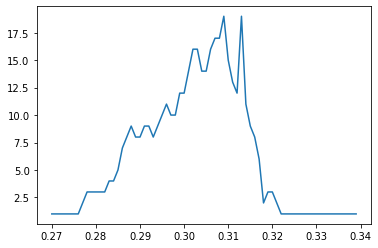

In [27]:
plt.plot(alp,y2)

In [50]:
bb,dens,comp=extract_bb(G,0.313)
print("there are:", len(bb.nodes()), "nodes")
print("there are:", len(bb.edges()), "links")

there are: 198 nodes
there are: 372 links


In [51]:
ww=open("data/cell_lines_corr-above0-5-0-313.net","w")
ww.write("#SOURCE\t#TARGET\t#WEIGHT\n")
Link_tab=nx.get_edge_attributes(bb,'weight')
for i in bb.edges():
    ww.write(str(i[0]+1)+"\t"+str(i[1]+1)+"\t"+str(Link_tab[i]["weight"])+"\n")
ww.close()


In [44]:
info=open("data/cell_info.txt",'r').read()
info=info.split("\n")
info.remove("")
header=info[0].split("\t")[0]+"\t"+info[0].split("\t")[5]+"\t"+info[0].split("\t")[37]#information related to DepMap_ID/Cancer_Type/Gender
info.remove(info[0])
dic={}
for i in info:
    tmp=i.split("\t")
    dic[tmp[0]]=[tmp[5],tmp[-1]]
for i in Cell:
    if i not in dic.keys():
        dic[i]=["NA", "NA"]
ww=open("data/cell_lines_corr-above0-5-0-309.nodes","w")
ww.write("Node_ID\t"+header+"\n")
for i in sorted(list(bb.nodes())):
    ww.write(str(i+1)+"\t"+Cell[i]+"\t"+dic[Cell[i]][0]+"\t"+dic[Cell[i]][1]+"\n")    
ww.close()

## Computing cancer_type-cancer_type links and node statistics

In [45]:
net=open("data/cell_lines_corr-above0-5-0-309.net","r").read()
net=net.split("\n")
net.remove("")
net.remove(net[0])
link_class={}
Nl=len(net)
C={}
ww1=open("data/cell_lines_corr-above0-5-0-309.linkclass.dat","w")
ww2=open("data/cell_lines_corr-above0-5-0-309.nodeclass.dat","w")
for i in Cell:
    for j in Cell:        
        link_class[dic[i][0]+":"+dic[j][0]]=0
        C[dic[i][0]]=0
        C[dic[j][0]]=0
LIST=[]
for l in net:
    tmp=l.split("\t")[0:2]
    link_class[dic[Cell[int(tmp[0])-1]][0]+":"+dic[Cell[int(tmp[1])-1]][0]]+=1
    if tmp[0] not in LIST:
        C[dic[Cell[int(tmp[0])-1]][0]]+=1
        LIST.append(tmp[0])
    if tmp[1] not in LIST:
        C[dic[Cell[int(tmp[1])-1]][0]]+=1
        LIST.append(tmp[1])
N=len(LIST)
rez={}
LIST=[]
cncer=[]
W=0
for i in link_class.keys():
    if i.split(":")[0] not in cncer:
        cncer.append(i.split(":")[0])
    if i.split(":")[1] not in cncer:
        cncer.append(i.split(":")[1])
    W+=link_class[i]
for i in range(len(cncer)):
    for j in range(i,len(cncer)):
        I=cncer[i]
        J=cncer[j]
        LIST.append(I+":"+J)
        if I!=J:
            rez[I+":"+J]=link_class[I+":"+J]+link_class[J+":"+I]
        if I==J:
            rez[I+":"+J]=link_class[I+":"+J]
link_class=[]
link_class_name=[]
for i in LIST:
    if rez[i]>0:
        z=0
        link_class_name.append(i)
        link_class.append(rez[i])
tmp=sorted(range(len(link_class)), key=lambda k : link_class[k], reverse=True)
ww1.write("#SOURCE\t#TARGET\t#LINK\n")
for i in tmp:
    ww1.write(link_class_name[i].replace(":","\t")+"\t"+str(link_class[i])+"\n")
ww1.close()
LIST=[[],[]]
for i in C.keys():
    if C[i]>0:        
        LIST[0].append(i)
        LIST[1].append(C[i])
tmp=sorted(range(len(LIST[0])), key=lambda k : LIST[1][k], reverse=True)
ww2.write("#CANCER"+"\t"+"#OCCURANCE"+"\n")
for i in tmp:
    ww2.write(LIST[0][i]+"\t"+str(LIST[1][i])+"\n")
ww2.close()


## Homophiliness


In [46]:
a=open("data/cell_lines_corr-above0-5-0-309.linkclass.dat","r").read()
a=a.split("\n")
a.remove("")
a.remove(a[0])
b=open("data/cell_lines_corr-above0-5-0-309.nodeclass.dat","r").read()
b=b.split("\n")
b.remove("")
b.remove(b[0])
HOM={}
DIFF={}
LINK=[]
BAL={}
ww=open("data/cell_lines_corr-above0-5-0-309.homophiliness","w")
for i in a:
    tmp=i.split("\t")
    HOM[tmp[0]]=0
    HOM[tmp[1]]=0
    DIFF[tmp[0]]=0
    DIFF[tmp[1]]=0
for i in a:
    tmp=i.split("\t")
    if tmp[0] != tmp[1]:
        DIFF[tmp[0]]+=int(tmp[2])
        DIFF[tmp[1]]+=int(tmp[2])
    else:
        HOM[tmp[0]]=int(tmp[2])
LIST=[[],[]]
for i in a:
    tmp=i.split("\t")
    BAL[tmp[0]]=(1.0*(HOM[tmp[0]]-DIFF[tmp[0]]))/(1.0*(HOM[tmp[0]]+DIFF[tmp[0]]))
    if tmp[0] not in LIST[0]:
        LIST[0].append(tmp[0])
        LIST[1].append(BAL[tmp[0]])
    BAL[tmp[1]]=(1.0*(HOM[tmp[1]]-DIFF[tmp[1]]))/(1.0*(HOM[tmp[1]]+DIFF[tmp[1]]))
    if tmp[1] not in LIST[0]:
        LIST[0].append(tmp[1])
        LIST[1].append(BAL[tmp[1]])
C={}
for i in b:
    tmp=i.split("\t")
    C[tmp[0]]=tmp[1]
tmp=sorted(range(len(LIST[0])), key=lambda k : LIST[1][k], reverse=True)
ww.write("#CANCER"+"\t"+"#HOMOPHILINESS"+"\t"+"#NODE_OCCURANCE"+"\n")
for i in tmp:
    ww.write(LIST[0][i]+"\t"+str(LIST[1][i])+"\t"+C[LIST[0][i]]+"\n")
ww.close()